In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Shape of training dataset

X_train.shape

(60000, 28, 28)

In [ ]:
# To reshape X_train dataset i.e. to add gray scale (_, _, _, 1)

X_train = X_train.reshape((-1, 28, 28, 1))
# X_test = X_test.reshape((-1, 28, 28, 1))

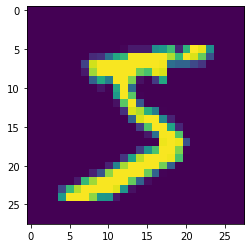

In [ ]:
# Display first element of training dataset
plt.imshow(X_train[0])
plt.show()

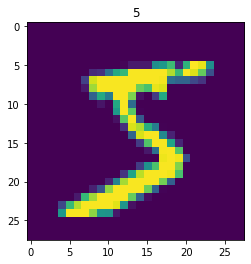

In [ ]:
# Display first element with title of the image (in y_train)

plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

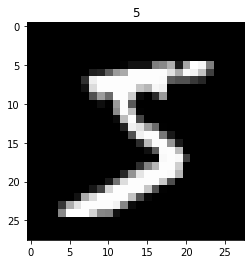

In [ ]:
# The image we got in previous cell is coloured which matplot do it

plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [ ]:
# Creating Model

from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters = 4, kernel_size = (5,5), activation = 'relu', input_shape = (28, 28, 1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 4, kernel_size = (7,7), activation = 'relu'))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_5 (Averag  (None, 3, 3, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 36)                0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
# Train Model

model.fit(X_train, y_train, epochs = 1, batch_size = 1)

60000/60000 [==============================] - 139s 2ms/step - loss: 0.5414 - acc: 0.8279


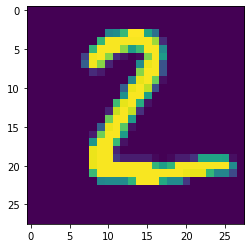

In [ ]:
# Test Model

plt.imshow(X_test[1])

In [ ]:
test = X_test[1].reshape(-1, 28, 28, 1)
test.shape

(1, 28, 28, 1)

1/1 [==============================] - 0s 18ms/step


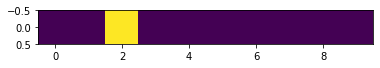

In [ ]:
img = model.predict(test)
plt.imshow(img)
plt.show()

In [ ]:
# Save Model

model.save('/content/digit_recognition_board.h5')